Building three RNN models for Sentiment Analysis, using three different architectures [Tanh, the traditional architecture, LSTM and GRU, the Gated Unit Architecture]

In [119]:
# importing the required libraries

import pandas as pd
from sklearn.model_selection import train_test_split
from keras.models import Sequential
from keras.models import Sequential
from keras.layers import Embedding, GRU, Dense, LSTM, SimpleRNN
from keras.optimizers import Adam
from keras.preprocessing.text import Tokenizer
from keras.preprocessing.sequence import pad_sequences
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
import numpy as np

In [120]:
# reading the dataset

data = pd.read_csv('IMDB_Dataset.csv')
data.head()

,review,sentiment
0,One of the other reviewers has mentioned that ...,positive
1,A wonderful little production. <br /><br />The...,positive
2,I thought this was a wonderful way to spend ti...,positive
3,Basically there's a family where a little boy ...,negative
4,"Petter Mattei's ""Love in the Time of Money"" is...",positive


In [121]:
# sample reviews 

data['review'][2], data['sentiment'][2]

('I thought this was a wonderful way to spend time on a too hot summer weekend, sitting in the air conditioned theater and watching a light-hearted comedy. The plot is simplistic, but the dialogue is witty and the characters are likable (even the well bread suspected serial killer). While some may be disappointed when they realize this is not Match Point 2: Risk Addiction, I thought it was proof that Woody Allen is still fully in control of the style many of us have grown to love.<br /><br />This was the most I\'d laughed at one of Woody\'s comedies in years (dare I say a decade?). While I\'ve never been impressed with Scarlet Johanson, in this she managed to tone down her "sexy" image and jumped right into a average, but spirited young woman.<br /><br />This may not be the crown jewel of his career, but it was wittier than "Devil Wears Prada" and more interesting than "Superman" a great comedy to go see with friends.',
 'positive')

In [122]:
# data shape and nunique values

data.shape

(50000, 2)

In [123]:
data.sentiment.value_counts()

sentiment
positive    25000
negative    25000
Name: count, dtype: int64

In [124]:
# checking for null values

data.isnull().sum()

review       0
sentiment    0
dtype: int64

In [125]:
x_train, x_val, y_train, y_val = train_test_split(data['review'], data['sentiment'], test_size=0.2, random_state=42)	

In [126]:
# Data Preprocessing

# Tokenize and pad the input sequences
max_words = 10000
max_len = 100

tokenizer = Tokenizer(num_words=max_words)
tokenizer.fit_on_texts(x_train)
x_train_seq = tokenizer.texts_to_sequences(x_train)
x_val_seq = tokenizer.texts_to_sequences(x_val)

x_train_pad = pad_sequences(x_train_seq, maxlen=max_len)
x_val_pad = pad_sequences(x_val_seq, maxlen=max_len)

# Encode labels
label_encoder = LabelEncoder()
y_train_encoded = label_encoder.fit_transform(y_train)
y_val_encoded = label_encoder.transform(y_val)

# Define the model
embedding_dim = 128
units = 128


In [127]:
# GRU model

gru_model = Sequential()
gru_model.add(Embedding(max_words, embedding_dim, input_length=max_len))
gru_model.add(GRU(units=units, dropout=0.2, recurrent_dropout=0.2))
gru_model.add(Dense(1, activation='sigmoid'))

# Compile the model
gru_model.compile(optimizer=Adam(), loss='binary_crossentropy', metrics=['accuracy'])

# Train the model
gru_history = gru_model.fit(x_train_pad, y_train_encoded, epochs=5, batch_size=32, validation_data=(x_val_pad, y_val_encoded))

# Evaluate the model on the validation set
loss, accuracy = gru_model.evaluate(x_val_pad, y_val_encoded)
print(f"Validation Loss: {loss:.4f}, Validation Accuracy: {accuracy:.4f}")

Epoch 1/5
1250/1250 [==============================] - 169s 134ms/step - loss: 0.3785 - accuracy: 0.8242 - val_loss: 0.2973 - val_accuracy: 0.8724
Epoch 2/5
1250/1250 [==============================] - 166s 133ms/step - loss: 0.2328 - accuracy: 0.9083 - val_loss: 0.2898 - val_accuracy: 0.8728
Epoch 3/5
1250/1250 [==============================] - 167s 134ms/step - loss: 0.1663 - accuracy: 0.9388 - val_loss: 0.3318 - val_accuracy: 0.8709
Epoch 4/5
1250/1250 [==============================] - 167s 133ms/step - loss: 0.1163 - accuracy: 0.9575 - val_loss: 0.3871 - val_accuracy: 0.8648
Epoch 5/5
313/313 [==============================] - 5s 16ms/step - loss: 0.4711 - accuracy: 0.8599
Validation Loss: 0.4711, Validation Accuracy: 0.8599


In [128]:
# LSTM model

# Define the model

lstm_model = Sequential()
lstm_model.add(Embedding(input_dim=max_words, output_dim=embedding_dim, input_length=max_len))
lstm_model.add(LSTM(units= units))
lstm_model.add(Dense(units=1, activation='sigmoid'))

# Compile the model
lstm_model.compile(optimizer=Adam(), loss='binary_crossentropy', metrics=['accuracy'])

# Train the model
lstm_history = lstm_model.fit(x_train_pad, y_train_encoded, epochs=5, batch_size=32, validation_data=(x_val_pad, y_val_encoded))

# Evaluate the model on the validation set
loss, accuracy = lstm_model.evaluate(x_val_pad, y_val_encoded)
print(f"Validation Loss: {loss:.4f}, Validation Accuracy: {accuracy:.4f}")

Epoch 1/5
1250/1250 [==============================] - 131s 103ms/step - loss: 0.3875 - accuracy: 0.8264 - val_loss: 0.3190 - val_accuracy: 0.8627
Epoch 2/5
1250/1250 [==============================] - 129s 103ms/step - loss: 0.2561 - accuracy: 0.8974 - val_loss: 0.3066 - val_accuracy: 0.8681
Epoch 3/5
1250/1250 [==============================] - 129s 103ms/step - loss: 0.1853 - accuracy: 0.9276 - val_loss: 0.3515 - val_accuracy: 0.8629
Epoch 4/5
1250/1250 [==============================] - 130s 104ms/step - loss: 0.1360 - accuracy: 0.9494 - val_loss: 0.4124 - val_accuracy: 0.8552
Epoch 5/5
313/313 [==============================] - 8s 27ms/step - loss: 0.4687 - accuracy: 0.8588
Validation Loss: 0.4687, Validation Accuracy: 0.8588


In [129]:
# TanH model

# Define the model

tanh_model = Sequential()
tanh_model.add(SimpleRNN(units=units, activation='tanh', input_shape=(max_len, 1 )))
tanh_model.add(Dense(units=1, activation='sigmoid'))

x_train_pad_reshaped = np.reshape(x_train_pad, (x_train_pad.shape[0], x_train_pad.shape[1], 1))
x_val_pad_reshaped = np.reshape(x_val_pad, (x_val_pad.shape[0], x_val_pad.shape[1], 1))

# Compile the model
tanh_model.compile(optimizer=Adam(), loss='binary_crossentropy', metrics=['accuracy'])

# Train the model
tanh_history = tanh_model.fit(x_train_pad_reshaped, y_train_encoded, epochs=5, batch_size=32, validation_data=(x_val_pad_reshaped, y_val_encoded))

# Evaluate the model on the validation set
loss, accuracy = tanh_model.evaluate(x_val_pad_reshaped, y_val_encoded)
print(f"Validation Loss: {loss:.4f}, Validation Accuracy: {accuracy:.4f}")


Epoch 1/5


1250/1250 [==============================] - 18s 14ms/step - loss: 0.6999 - accuracy: 0.5004 - val_loss: 0.7019 - val_accuracy: 0.4952
Epoch 2/5
1250/1250 [==============================] - 18s 14ms/step - loss: 0.6960 - accuracy: 0.5050 - val_loss: 0.6956 - val_accuracy: 0.5158
Epoch 3/5
1250/1250 [==============================] - 18s 14ms/step - loss: 0.6955 - accuracy: 0.5024 - val_loss: 0.7028 - val_accuracy: 0.5088
Epoch 4/5
1250/1250 [==============================] - 18s 14ms/step - loss: 0.6954 - accuracy: 0.5017 - val_loss: 0.6947 - val_accuracy: 0.5121
Epoch 5/5
313/313 [==============================] - 1s 5ms/step - loss: 0.6921 - accuracy: 0.5131
Validation Loss: 0.6921, Validation Accuracy: 0.5131


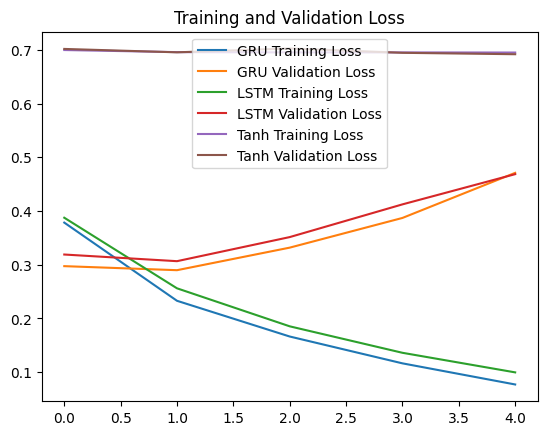

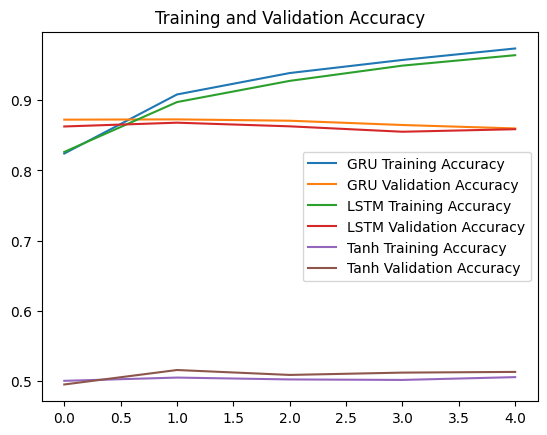

In [130]:
# plot the loss and accuracy of the three models

import matplotlib.pyplot as plt

plt.plot(gru_history.history['loss'], label='GRU Training Loss')
plt.plot(gru_history.history['val_loss'], label='GRU Validation Loss')
plt.plot(lstm_history.history['loss'], label='LSTM Training Loss')
plt.plot(lstm_history.history['val_loss'], label='LSTM Validation Loss')
plt.plot(tanh_history.history['loss'], label='Tanh Training Loss')
plt.plot(tanh_history.history['val_loss'], label='Tanh Validation Loss')
plt.legend()
plt.title('Training and Validation Loss')
plt.show()

plt.plot(gru_history.history['accuracy'], label='GRU Training Accuracy')
plt.plot(gru_history.history['val_accuracy'], label='GRU Validation Accuracy')
plt.plot(lstm_history.history['accuracy'], label='LSTM Training Accuracy')
plt.plot(lstm_history.history['val_accuracy'], label='LSTM Validation Accuracy')
plt.plot(tanh_history.history['accuracy'], label='Tanh Training Accuracy')
plt.plot(tanh_history.history['val_accuracy'], label='Tanh Validation Accuracy')
plt.legend()
plt.title('Training and Validation Accuracy')
plt.show()



In [131]:
# using the model to predict the sentiment of a review

def predict_sentiment(review):

    # Tokenize and pad the sequence
    tokenized_review = tokenizer.texts_to_sequences([review])
    pad_review = pad_sequences(tokenized_review, maxlen=max_len)

    # Predict
    prediction = gru_model.predict(pad_review)[0][0]
    print(f"Review text: {review}")
    print(f"Predicted sentiment: {'Positive' if prediction > 0.5 else 'Negative'} ({prediction:.2f})")

predict_sentiment("This movie is fantastic! I really like it because it is so good!")
predict_sentiment("Garbage! I hate this movie and everything about it.")
predict_sentiment("The movie was meh. It is neither good nor bad.")
predict_sentiment("I could not understand anything that was happening in the movie. It was so confusing.")
predict_sentiment("I am not sure how I feel about this movie. Sometimes I like it, but sometimes I hate it.")
predict_sentiment("This is a movie I will definitely watch again. I really liked it!")	
predict_sentiment("I really liked the main character and the story line of the movie.")
predict_sentiment("The movie really sucked. I hated everything about it.")
predict_sentiment("What a nice movie. I really liked it.")
predict_sentiment("What an awful movie. I really hated it.")

1/1 [==============================] - 0s 186ms/step
Review text: This movie is fantastic! I really like it because it is so good!
Predicted sentiment: Positive (1.00)
1/1 [==============================] - 0s 19ms/step
Review text: Garbage! I hate this movie and everything about it.
Predicted sentiment: Negative (0.02)
1/1 [==============================] - 0s 19ms/step
Review text: The movie was meh. It is neither good nor bad.
Predicted sentiment: Negative (0.07)
1/1 [==============================] - 0s 18ms/step
Review text: I could not understand anything that was happening in the movie. It was so confusing.
Predicted sentiment: Negative (0.00)
1/1 [==============================] - 0s 20ms/step
Review text: I am not sure how I feel about this movie. Sometimes I like it, but sometimes I hate it.
Predicted sentiment: Positive (0.64)
1/1 [==============================] - 0s 18ms/step
Review text: This is a movie I will definitely watch again. I really liked it!
Predicted sentiment

1/1 [==============================] - 0s 20ms/step
Review text: I really liked the main character and the story line of the movie.
Predicted sentiment: Positive (0.96)
1/1 [==============================] - 0s 23ms/step
Review text: The movie really sucked. I hated everything about it.
Predicted sentiment: Negative (0.06)
1/1 [==============================] - 0s 20ms/step
Review text: What a nice movie. I really liked it.
Predicted sentiment: Positive (1.00)
1/1 [==============================] - 0s 20ms/step
Review text: What an awful movie. I really hated it.
Predicted sentiment: Negative (0.00)
